### USING PCA TO ACHIEVE SEPARABILITY

In [11]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


### Looking at the Data

In [4]:
#First look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


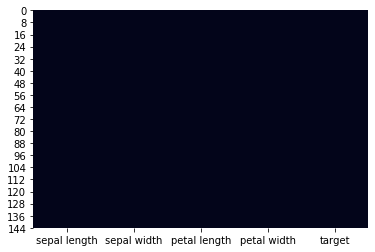

In [17]:
sns.heatmap(df.isna(),cbar=False)

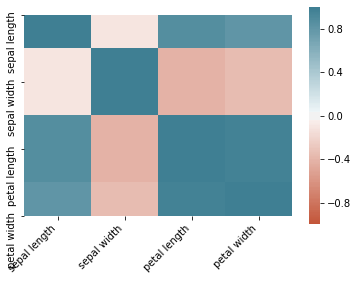

In [20]:
corrMat = df.corr()
ax =sns.heatmap(corrMat,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [42]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [17]:
X = StandardScaler().fit_transform(x)

In [21]:
(x[:10],X[:10])

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
        [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
        [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
        [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
        [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
        [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
        [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
        [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
        [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
        [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]]))

In [28]:
print(f"Before standard transofrmation:")
print((min(x[:][0]),max(x[:][0])))
print(f"After standard transofrmation:")
print((min(X[:][0]),max(X[:][0])))

Before transofrmation:
(0.2, 5.1)
After transofrmation:
(-1.3412724047598314, 1.0320572244889565)


In [57]:
pca = PCA(2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.shape
#Add target column
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

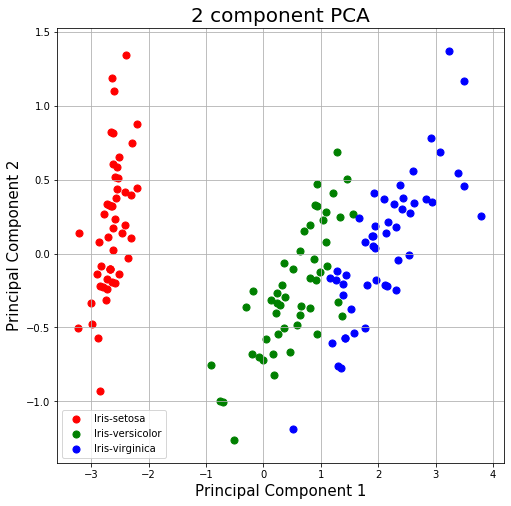

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### LESS SEPARATED BEFORE PCA

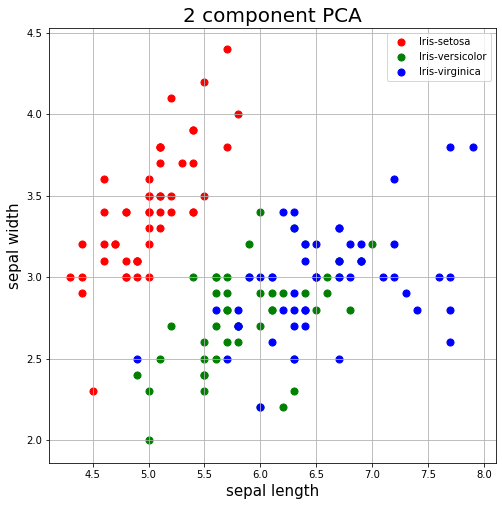

In [69]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(features[0], fontsize = 15)
ax.set_ylabel(features[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(df.loc[indicesToKeep, features[0]]
               , df.loc[indicesToKeep, features[1]]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

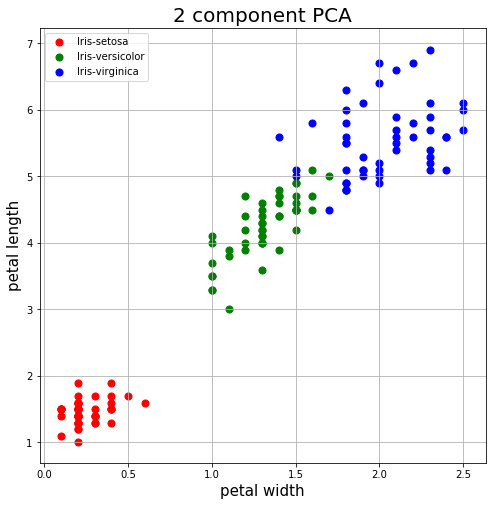

In [70]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(features[-1], fontsize = 15)
ax.set_ylabel(features[-2], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(df.loc[indicesToKeep, features[-1]]
               , df.loc[indicesToKeep, features[-2]]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [78]:
print(f'Amount of variance explained by PC1 and PC2 {sum(pca.explained_variance_ratio_)}')

Amount of variance explained by PC1 and PC2 0.9776317750248035


### PCA TO SPEED UP LEARNING

In [81]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [84]:
mnist.data.shape

(70000, 784)

In [109]:
#choose the minimum number of principal components such that 95% of the variance is retained
pca = PCA(.95)

In [110]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [111]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [112]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [116]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\saurmisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\saurmisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\saurmisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\saurmisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\saurmisr\AppData\Local\Continuum\ana

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [118]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '4', '7', '1', '1', '7'], dtype=object)

In [119]:
logisticRegr.score(test_img, test_lbl)

0.9116